In [1]:
import numpy as np
import pandas as pd

In [35]:
df = pd.read_excel('report_pivot_merged.xlsx', 
                   header=[0], 
                   index_col=[1,2,3,4,5], 
                   sheet_name="cons_hh_accounts")

In [36]:
df.drop('Unnamed: 0',axis = 1, inplace = True)
df.sort_index(inplace=True)

In [38]:
df

Value
Scenario Region HH  Sector       Year            
diss_BAU BNL    hh1 AGR          2011    0.945450
                                 2015    0.955746
                                 2020    0.806437
                                 2025    1.075207
                                 2030    1.099853
...                                           ...
diss_ref UKI    hh5 total_inputs 2030  472.609515
                                 2035  513.983974
                                 2040  561.535899
                                 2045  611.736039
                                 2050  673.492514

[49755 rows x 1 columns]

In [39]:
scenarios = df.index.levels[0]
regions = df.index.levels[1]
hhs = df.index.levels[2]
sectors = df.index.levels[3]
years = df.index.levels[4]

In [40]:
sectors

Index(['AGR', 'BUI', 'CHM', 'CO2_NETSr', 'COL', 'CRU', 'FOT', 'IRS', 'MAC',
       'ROI', 'SER', 'TRN', 'dwe', 'ele', 'ele_car', 'gas', 'mvh', 'nfm',
       'nmm', 'oil', 'oil_car', 'ppp', 'tax_inputs', 'tax_rebate', 'total',
       'total_inputs'],
      dtype='object', name='Sector')

In [41]:
cons_share = []

for scenario in scenarios:
    for region in regions:
        for hh in hhs:
            for sector in sectors:
                for year in years:
                    if (scenario, region, hh, sector, year) in df.index:
                        cons_share.append(100 * (df.loc[(scenario, region, hh, sector, year)]/df.loc[(scenario, region, hh, "total", year)]))

In [42]:
df_T = df.T
df_T.loc[('consumption_share[%]'),:] = tuple(cons_share)

In [43]:
df_T.T

Value  consumption_share[%]
Scenario Region HH  Sector       Year                                  
diss_BAU BNL    hh1 AGR          2011    0.945450              1.185262
                                 2015    0.955746              1.194528
                                 2020    0.806437              1.215391
                                 2025    1.075207              1.206460
                                 2030    1.099853              1.184431
...                                           ...                   ...
diss_ref UKI    hh5 total_inputs 2030  472.609515             95.252741
                                 2035  513.983974             95.221338
                                 2040  561.535899             95.327611
                                 2045  611.736039             95.395925
                                 2050  673.492514             95.412369

[49755 rows x 2 columns]

In [44]:
df=df_T.T

In [45]:
df

Value  consumption_share[%]
Scenario Region HH  Sector       Year                                  
diss_BAU BNL    hh1 AGR          2011    0.945450              1.185262
                                 2015    0.955746              1.194528
                                 2020    0.806437              1.215391
                                 2025    1.075207              1.206460
                                 2030    1.099853              1.184431
...                                           ...                   ...
diss_ref UKI    hh5 total_inputs 2030  472.609515             95.252741
                                 2035  513.983974             95.221338
                                 2040  561.535899             95.327611
                                 2045  611.736039             95.395925
                                 2050  673.492514             95.412369

[49755 rows x 2 columns]

In [51]:
idx = pd.IndexSlice

df.loc[idx[:,:,:,"total",:]]

Value  consumption_share[%]
Scenario Region HH  Year                                  
diss_BAU BNL    hh1 2011   79.767157                 100.0
                    2015   80.010339                 100.0
                    2020   66.352031                 100.0
                    2025   89.120865                 100.0
                    2030   92.859159                 100.0
...                              ...                   ...
diss_ref UKI    hh5 2030  496.163689                 100.0
                    2035  539.778149                 100.0
                    2040  589.059029                 100.0
                    2045  641.260136                 100.0
                    2050  705.875474                 100.0

[2025 rows x 2 columns]

In [52]:
sectors

Index(['AGR', 'BUI', 'CHM', 'CO2_NETSr', 'COL', 'CRU', 'FOT', 'IRS', 'MAC',
       'ROI', 'SER', 'TRN', 'dwe', 'ele', 'ele_car', 'gas', 'mvh', 'nfm',
       'nmm', 'oil', 'oil_car', 'ppp', 'tax_inputs', 'tax_rebate', 'total',
       'total_inputs'],
      dtype='object', name='Sector')

In [59]:
cons_share_no_NETS = []

for scenario in scenarios:
    for region in regions:
        for hh in hhs:
            for sector in sectors:
                for year in years:
                    if (scenario, region, hh, sector, year) in df.index:
                        if (scenario, region, hh, "CO2_NETSr", year) in df.index:
                            cons_share_no_NETS.append(100 *(df.loc[(scenario, region, hh, sector, year)]['Value']/(df.loc[(scenario, region, hh, "total", year)]['Value'] - df.loc[(scenario, region, hh, "CO2_NETSr", year)]['Value'])))
                        else: cons_share_no_NETS.append(df.loc[(scenario, region, hh, sector, year)]['consumption_share[%]'])

In [60]:
cons_share_no_NETS

[1.1852620779407899,
 1.1945281800910594,
 1.2153911303808906,
 1.2091101363617034,
 1.2273230475524728,
 1.2328350868981763,
 1.2308835907478162,
 1.2207761005712594,
 1.1832858102198607,
 0.14691793601097652,
 0.14938823458298664,
 0.15533742934399605,
 0.1564004568952329,
 0.16297233648847456,
 0.16718683431052098,
 0.16850522247635147,
 0.16805949427443795,
 0.16284142570182814,
 2.362068937337198,
 2.3805350407135664,
 2.4221121127704377,
 2.4095949310057945,
 2.4458908292572086,
 2.4568755871113424,
 2.4529865160578685,
 2.4328436387779635,
 2.358130499853752,
 0.21967210542456617,
 3.6213187522885404,
 6.497269734432424,
 9.01091670641867,
 12.922450958957402,
 19.20871430212285,
 0.00329226576622459,
 0.002855618204895945,
 0.0023692415276581305,
 0.0021389771035867726,
 0.0006432367885244451,
 0.0003572718412197588,
 0.00019554336622021012,
 9.523203432419451e-05,
 3.1944796556804245e-05,
 5.141137842171931e-07,
 5.14523473457135e-07,
 5.124350440947634e-07,
 5.367476970521603

In [61]:
df_T = df.T
df_T.loc[('cons_share_no_NETS[%]'),:] = tuple(cons_share_no_NETS)

In [63]:
df = df_T.T

In [64]:
import matplotlib.pyplot as plt

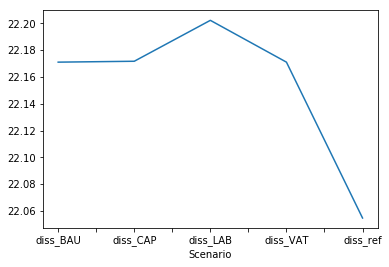

In [77]:
df.loc[idx[:, "DEU", "hh1", "dwe", 2030]]['cons_share_no_NETS[%]'].plot()

In [78]:
import seaborn as sb

D:\Python\conda\envs\deep-learning\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [81]:
df

Value  consumption_share[%]  \
Scenario Region HH  Sector       Year                                     
diss_BAU BNL    hh1 AGR          2011    0.945450              1.185262   
                                 2015    0.955746              1.194528   
                                 2020    0.806437              1.215391   
                                 2025    1.075207              1.206460   
                                 2030    1.099853              1.184431   
...                                           ...                   ...   
diss_ref UKI    hh5 total_inputs 2030  472.609515             95.252741   
                                 2035  513.983974             95.221338   
                                 2040  561.535899             95.327611   
                                 2045  611.736039             95.395925   
                                 2050  673.492514             95.412369   

                                       cons_share_no_NETS[%]  
Scenario Region HH  Sector       Year                         
diss_BAU BNL    hh1 AGR          2011               1.185262  
                                 2015               1.194528  
                                 2020               1.215391  
                                 2025               1.209110  
                                 2030               1.227323  
...                                                      ...  
diss_ref UKI    hh5 total_inputs 2030              95.252741  
                                 2035              95.221338  
                                 2040              95.327611  
                                 2045              95.395925  
                                 2050              95.412369  

[49755 rows x 3 columns]

In [99]:
col_names=["scenario", "region", "hh", "sector", "year", "Value", "consumption_share[%]", "cons_share_no_NETS[%]", "diff_ref"]

df_pivot = pd.DataFrame(columns = col_names)

for scenario in scenarios:
    for region in regions:
        for hh in hhs:
            for sector in sectors:
                for year in years:
                    if (scenario, region, hh, sector, year) in df.index:
                        value = df.loc[idx[scenario, region, hh, sector, year]]['Value']
                        share_1 = df.loc[idx[scenario, region, hh, sector, year]]['consumption_share[%]']
                        share_2 = df.loc[idx[scenario, region, hh, sector, year]]['cons_share_no_NETS[%]']
                        if ("diss_ref", region, hh, sector, year) in df.index:
                            diff = (df.loc[idx[scenario, region, hh, sector, year]]['cons_share_no_NETS[%]'] - df.loc[idx["diss_ref", region, hh, sector, year]]['cons_share_no_NETS[%]'])
                        df_pivot = df_pivot.append(pd.DataFrame([[scenario, region, hh, sector, year,value,share_1,share_2, diff]],
                                                  columns = col_names),
                                                  ignore_index=True)


In [100]:
df_pivot

,scenario,region,hh,sector,year,Value,consumption_share[%],cons_share_no_NETS[%],diff_ref
0,diss_BAU,BNL,hh1,AGR,2011,0.945450,1.185262,1.185262,0.000000
1,diss_BAU,BNL,hh1,AGR,2015,0.955746,1.194528,1.194528,0.000000
2,diss_BAU,BNL,hh1,AGR,2020,0.806437,1.215391,1.215391,0.000000
3,diss_BAU,BNL,hh1,AGR,2025,1.075207,1.206460,1.209110,0.000941
4,diss_BAU,BNL,hh1,AGR,2030,1.099853,1.184431,1.227323,0.014583
...,...,...,...,...,...,...,...,...,...
49750,diss_ref,UKI,hh5,total_inputs,2030,472.609515,95.252741,95.252741,0.000000
49751,diss_ref,UKI,hh5,total_inputs,2035,513.983974,95.221338,95.221338,0.000000
49752,diss_ref,UKI,hh5,total_inputs,2040,561.535899,95.327611,95.327611,0.000000
49753,diss_ref,UKI,hh5,total_inputs,2045,611.736039,95.395925,95.395925,0.000000


In [95]:
df_pivot.loc[((df_pivot["region"]=="DEU") & (df_pivot["year"]==2030) & (df_pivot["sector"] == "dwe"))]

,scenario,region,hh,sector,year,Value,consumption_share[%],cons_share_no_NETS[%]
1219,diss_BAU,DEU,hh1,dwe,2030,49.900884,20.869751,22.171079
1441,diss_BAU,DEU,hh2,dwe,2030,49.370658,16.952953,18.216383
1663,diss_BAU,DEU,hh3,dwe,2030,50.980015,15.079494,16.206949
1885,diss_BAU,DEU,hh4,dwe,2030,53.267201,13.290134,14.231406
2107,diss_BAU,DEU,hh5,dwe,2030,57.950240,10.268218,10.864781
11170,diss_CAP,DEU,hh1,dwe,2030,51.234872,20.868840,22.171745
11392,diss_CAP,DEU,hh2,dwe,2030,49.601385,16.952141,18.217421
11614,diss_CAP,DEU,hh3,dwe,2030,50.968869,15.078849,16.208096
11836,diss_CAP,DEU,hh4,dwe,2030,53.198379,13.289689,14.232568
12058,diss_CAP,DEU,hh5,dwe,2030,57.590611,10.268088,10.865786


In [94]:
df_pivot["diss_BAU"]

KeyError: 'diss_BAU'

In [117]:
df.loc[idx["diss_BAU", "BNL", "hh1",:,2011]]

Value  consumption_share[%]  \
Scenario Region HH  Sector       Year                                       
diss_BAU BNL    hh1 AGR          2011  9.454499e-01          1.185262e+00   
                    BUI          2011  1.171923e-01          1.469179e-01   
                    CHM          2011  1.884155e+00          2.362069e+00   
                    COL          2011  2.626147e-03          3.292266e-03   
                    CRU          2011  4.100939e-07          5.141138e-07   
                    FOT          2011  7.340978e+00          9.203009e+00   
                    IRS          2011  6.208287e-03          7.783012e-03   
                    MAC          2011  1.974213e+00          2.474970e+00   
                    ROI          2011  4.922915e+00          6.171607e+00   
                    SER          2011  2.511623e+01          3.148694e+01   
                    TRN          2011  4.177962e+00          5.237698e+00   
                    dwe          2011  1.578048e+01          1.978317e+01   
                    ele          2011  9.099515e-01          1.140760e+00   
                    ele_car      2011  4.239595e-04          5.314963e-04   
                    gas          2011  5.144893e-01          6.449888e-01   
                    mvh          2011  3.010120e+00          3.773633e+00   
                    nfm          2011  6.749863e-03          8.461957e-03   
                    nmm          2011  2.511131e-01          3.148076e-01   
                    oil          2011  2.523968e-01          3.164169e-01   
                    oil_car      2011  3.531733e+00          4.427553e+00   
                    ppp          2011  1.005324e+00          1.260323e+00   
                    tax_inputs   2011  8.016444e+00          1.004981e+01   
                    total        2011  7.976716e+01          1.000000e+02   
                    total_inputs 2011  7.623500e+01          9.557192e+01   

                                       cons_share_no_NETS[%]  
Scenario Region HH  Sector       Year                         
diss_BAU BNL    hh1 AGR          2011           1.185262e+00  
                    BUI          2011           1.469179e-01  
                    CHM          2011           2.362069e+00  
                    COL          2011           3.292266e-03  
                    CRU          2011           5.141138e-07  
                    FOT          2011           9.203009e+00  
                    IRS          2011           7.783012e-03  
                    MAC          2011           2.474970e+00  
                    ROI          2011           6.171607e+00  
                    SER          2011           3.148694e+01  
                    TRN          2011           5.237698e+00  
                    dwe          2011           1.978317e+01  
                    ele          2011           1.140760e+00  
                    ele_car      2011           5.314963e-04  
                    gas          2011           6.449888e-01  
                    mvh          2011           3.773633e+00  
                    nfm          2011           8.461957e-03  
                    nmm          2011           3.148076e-01  
                    oil          2011           3.164169e-01  
                    oil_car      2011           4.427553e+00  
                    ppp          2011           1.260323e+00  
                    tax_inputs   2011           1.004981e+01  
                    total        2011           1.000000e+02  
                    total_inputs 2011           9.557192e+01

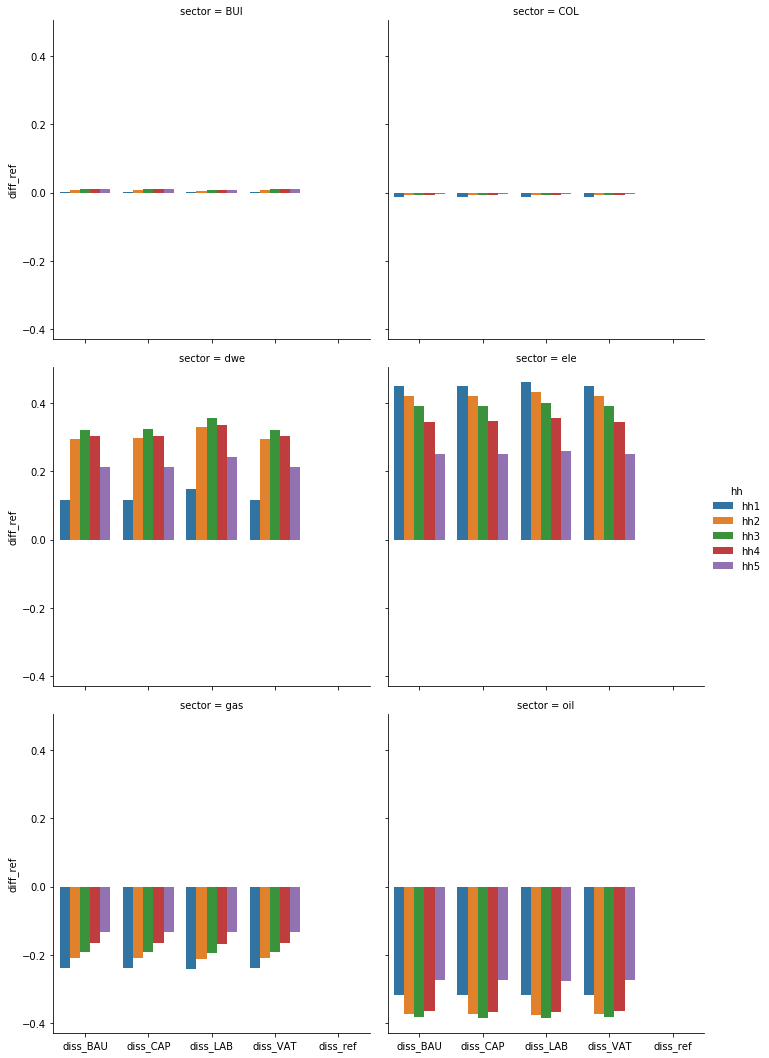

In [115]:
selected_sectors = ["dwe", "BUI", "ele", "oil", "COL", "gas"]

fg = sb.factorplot(x='scenario', y='diff_ref', 
                        hue='hh', 
                        col='sector',
                        col_wrap = 2,
                        data=df_pivot.loc[((df_pivot["region"]=="DEU") & (df_pivot["year"]==2030) & (df_pivot["sector"].isin(selected_sectors)))],
                        kind='bar')
fg.set_xlabels('')

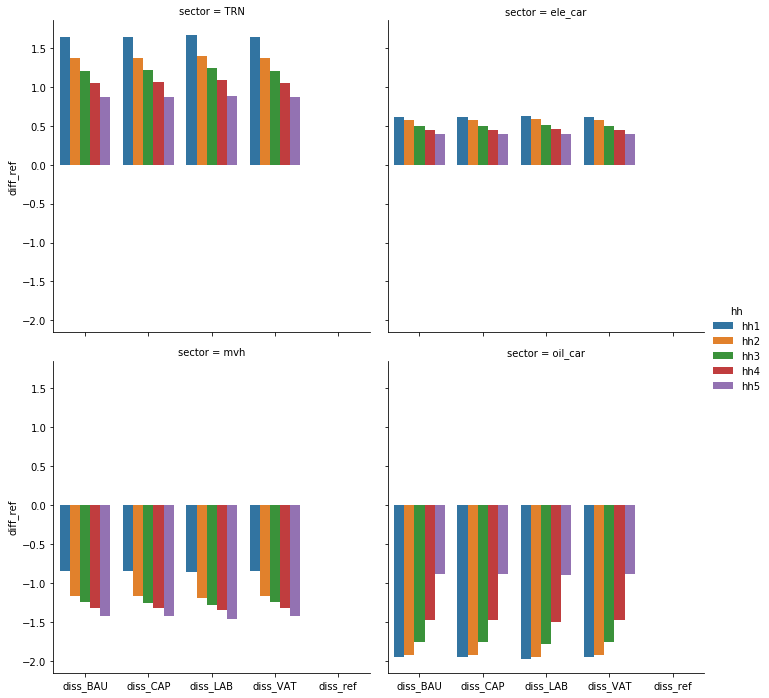

In [112]:
selected_sectors_tra = ["oil_car", "ele_car", "mvh", "TRN"]

fg = sb.factorplot(x='scenario', y='diff_ref', 
                        hue='hh', 
                        col='sector',
                        col_wrap = 2,
                        data=df_pivot.loc[((df_pivot["region"]=="DEU") & (df_pivot["year"]==2030) & (df_pivot["sector"].isin(selected_sectors_tra)))],
                        kind='bar')
fg.set_xlabels('')

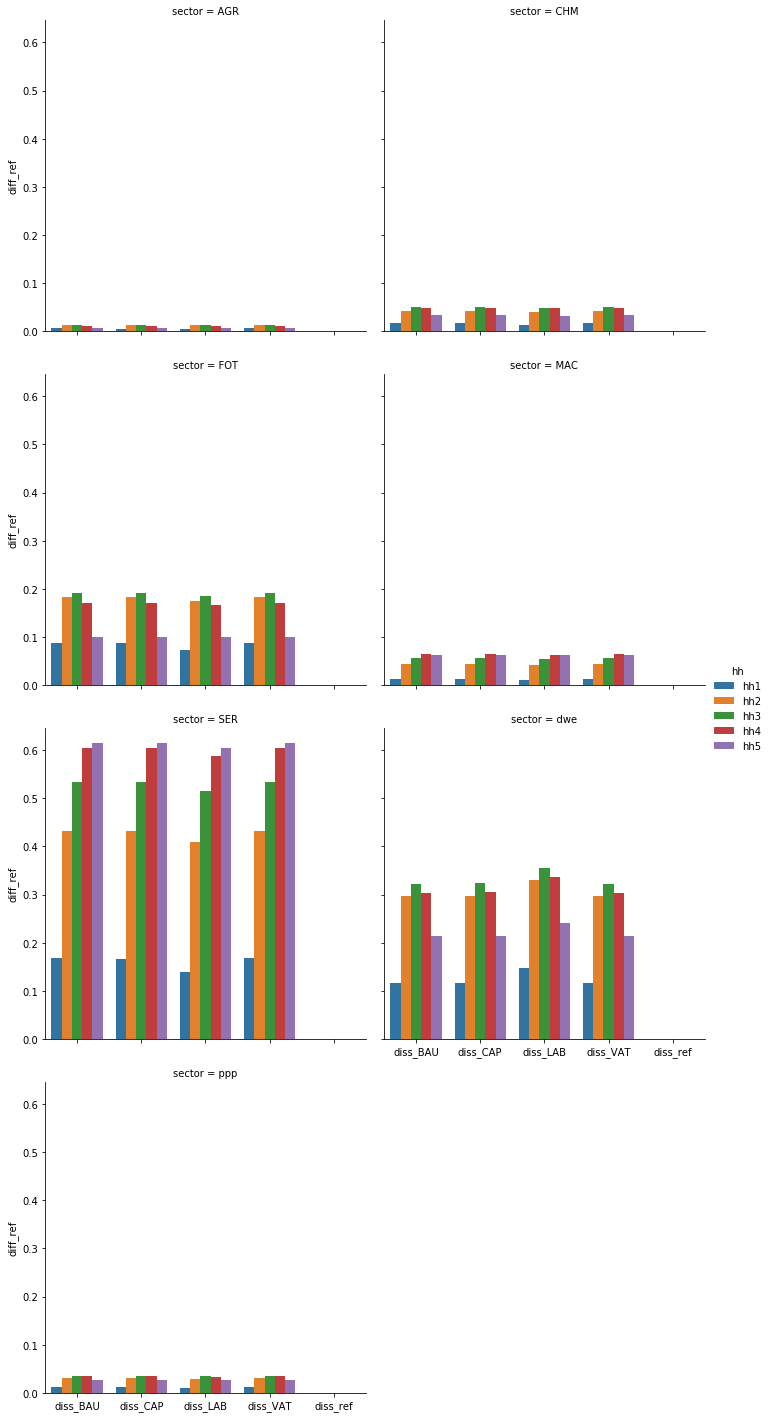

In [114]:
selected_sectors_rest = ["CHM", "AGR", "FOT", "MAC", "SER", "ppp", "dwe"]

fg = sb.factorplot(x='scenario', y='diff_ref', 
                        hue='hh', 
                        col='sector',
                        col_wrap = 2,
                        data=df_pivot.loc[((df_pivot["region"]=="DEU") & (df_pivot["year"]==2030) & (df_pivot["sector"].isin(selected_sectors_rest)))],
                        kind='bar')
fg.set_xlabels('')

In [103]:
sectors

Index(['AGR', 'BUI', 'CHM', 'CO2_NETSr', 'COL', 'CRU', 'FOT', 'IRS', 'MAC',
       'ROI', 'SER', 'TRN', 'dwe', 'ele', 'ele_car', 'gas', 'mvh', 'nfm',
       'nmm', 'oil', 'oil_car', 'ppp', 'tax_inputs', 'tax_rebate', 'total',
       'total_inputs'],
      dtype='object', name='Sector')

In [110]:
df_pivot.to_pickle("df_pivot")
df.to_pickle("cons_hh_accounts_multiindex")